# Logistic Regression

## Import libraries and data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [2]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
ds = pd.DataFrame(np.c_[data['data'], data['target']], columns= np.append(data['feature_names'], ['target']))

## Data Analysis

In [4]:
ds.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
ds.shape

(569, 31)

In [6]:
ds.keys()

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

### What does the class distribution look like?

In [7]:
# Define feature matrix and target vector (diagnosis)
X = ds.iloc[:,0:30]
y = pd.Series(ds.target)

Confirm that the variables look correct

In [8]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

Counter({1.0: 357, 0.0: 212})


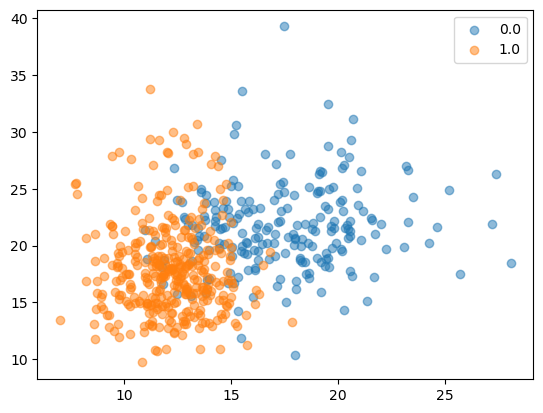

In [10]:
from collections import Counter
from numpy import where
from matplotlib import pyplot

counter = Counter(y)
print(counter)

x = ds.iloc[:,:-1].values
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label), alpha=0.5)
pyplot.legend()
pyplot.show()

39% (212) belong to class 0-malignant, while 62% of the data entries (357) belong to class 1-benign. In this respect, we can assume that we are dealing with a mild imbalanced class distribution.

## Data Preprocessing

In [11]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Compare the before and after

In [12]:
print("X= ", X)
print("X_scale= ", X_scaled)

X=       mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points 

## Principal Component Analysis

In [13]:
# Apply PCA to determine components
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

Text(0, 0.5, 'Explained variance (%)')

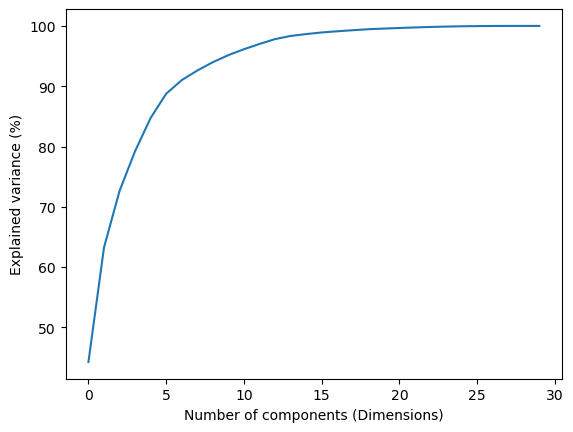

In [14]:
# Plot variances to distinguish optimal number of components
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [15]:
# Apply PCA with the selected 8 components
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)

Confirm that the data has been reduced

In [16]:
X_pca.shape

(569, 8)

## Training and testing

In [17]:
# Split data into training and testing 80:20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20,shuffle=True, random_state=2)

Confirm the division

In [18]:
print("Training X:", X_train.shape)
print("Testing X:", X_test.shape)

Training X: (455, 8)
Testing X: (114, 8)


In [19]:
#Initialize logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [20]:
#Train the model
lr.fit(X_train, y_train)

LogisticRegression()

## Performance Evaluation 

In [21]:
#Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np

y_pred = lr.predict(X_test)
y_true = y_test

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
print("Train accuracy:", np.round(accuracy_score(y_train, lr.predict(X_train)), 2))

Test accuracy: 0.97
Train accuracy: 0.99


A very high accuracy score may indicate overfitting or a biased data set. In this respect, we'll implement a 10-fold cross validation method to all evaluation metrics

In [22]:
# Evaluate accuracy score using cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import where, mean

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

scores = cross_val_score(lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('KFold Accuracy: %.3f' % mean (scores))
#print('Accuracy' % mean(scores))

KFold Accuracy: 0.944


In [23]:
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred)
print("Precision score: ", precision)

Precision score:  0.9714285714285714


In [24]:
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred)
print("Recall score: ", recall)

Recall score:  0.9855072463768116


In [25]:
# Evaluate AUC score using cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import where, mean

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

scores = cross_val_score(lr, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.990


Text(50.722222222222214, 0.5, 'True')

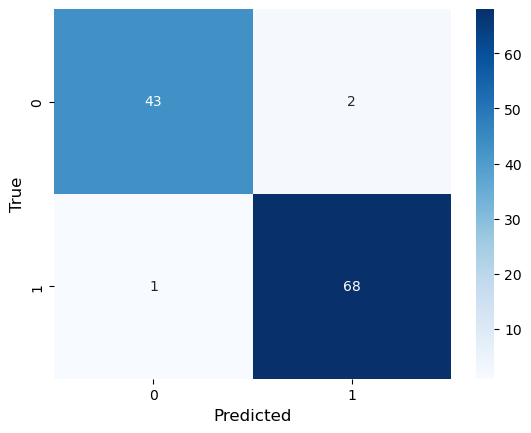

In [26]:
# Building the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)